In [2]:
# !pip install IPython 
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

- 해운대구_여행객 수와 불법 주정차 수 _2021년 까지
    - 샤피로 검증, 상관계수

In [ ]:
BVN <- read_excel('H_Visitor.xlsx')
BPBP <- left_join(BVN, BP, by=c('Year_Month'='year'))
shapiro.test(BPBP$Total_Visitor)
shapiro.test(BPBP$tot)
cor(BPBP$Total_Visitor,BPBP$tot)

In [ ]:
data:  BPBP$Total_Visitor
W = 0.97808, p-value = 0.5013

data:  BPBP$tot
W = 0.97966, p-value = 0.5644

[1] 0.3165063

- 기장군_여행객 수와 불법 주정차 수 _2021년 까지

In [ ]:
GJ_2021<- read_excel('2021기장군_주차_관광객수.xlsx')
View(GJ_2021)
shapiro.test(GJ_2021$park) 
shapiro.test(GJ_2021$pop)
cor(GJ_2021$pop,GJ_2021$park)

In [ ]:
data:  GJ_2021$park
		W = 0.88605, p-value = 0.1048

 data:  GJ_2021$pop
     W = 0.96723, p-value = 0.8797

[1] 0.558859

- 선그래프 코드

In [ ]:
JGx10 <- (JG$park*1000)
cbind(JGx10 ,JG)
ggplot(JG,) +geom_line(aes(x =data, y=JGx10,col = '불법 주정차 건수'),size = 2) 
+ geom_line(aes(x =data,y = pop, col = '여행객 수'), size = 2)

- 진구_여행객 수와 불법 주정차수 _2021년 까지(2018자료 없음)
    - 샤피로 검정

In [ ]:
JG <- read_excel('진구_주차_관광객.xlsx')
View(JG)
shapiro.test(JG$park)
shapiro.test(JG$pop)
cor(JG$pop,JG$park)

In [ ]:
data:  JG$park
W = 0.98048, p-value = 0.7613

data:  JG$pop
W = 0.98033, p-value = 0.7564

[1] 0.4621373

- 선그래프 코드, 상관계수

In [ ]:
GJx10 <- (GJ_2021$park*1000)
cbind(GJx10 ,GJ_2021)

ggplot(GJ_2021) +geom_line(aes(x =date, y=GJx10, col='불법 주정차 건수'),size = 2) 
+ geom_line(aes(x =date,y = pop, col='여행객 수'),size = 2) 
+ theme(axis.title = element_blank())

- 2014 ~ 2017 부산 여행객 수
    - 2014-2017 부산 여행객 그래프 코드

In [ ]:
names(BV)
[1] "Year_Month"        "Total_Visitor"     "Domestic_Visitor" 
[4] "Foreign_Visitor"   "Increase_Rate_Tot" "Increase_Rate_Dom"
[7] "Increase_Rate_For"

#install.packages('lubridate')
library(lubridate)

BVG_early <- BV[year(BV$Year_Month) < 2018,]

ggplot(BVG_early,aes(Year_Month,Total_Visitor,col='총 여행객')) 
+ geom_line(size=2) + geom_line(aes(Year_Month,Domestic_Visitor, col='국내여행객'),
size=2)
+ geom_line(aes(Year_Month,Foreign_Visitor, col='해외여행객'),size=2)
+ scale_x_continuous(breaks = seq(2014,2017,1)) 
+ theme(axis.title = element_blank(), legend.title = element_blank())

- 2014 ~ 2017 부산 여행객 샤피로 검정

In [ ]:
shapiro.test(BVG_early$Total_Visitor)

In [ ]:
Shapiro-Wilk normality test

data:  BVG_early$Total_Visitor
W = 0.98303, p-value = 0.9195

- 2014 ~ 2017 부산 여행객 수 증가 T검정 (alternative = 'greater')

In [ ]:
t.test(BVG_early$Total_Visitor, mu = BVG_early$Total_Visitor[BVG$Year==2014],
alternative = 'greater') 

In [ ]:
One Sample t-test

data:  BVG_early$Total_Visitor
t = 2.1964, df = 3, p-value = 0.05778
alternative hypothesis: true mean is greater than 10655830
95 percent confidence interval:
 10576307      Inf
sample estimates:
mean of x 
 11768647

- 2014 ~ 2017부산 여행객 수 감소 T 검정 (alternative = 'less') 

In [ ]:
t.test(BVG_early$Total_Visitor, mu = BVG_early$Total_Visitor[BVG$Year==2014],
alternative = 'less')

In [ ]:
data:  BVG_early$Total_Visitor
t = 2.1964, df = 3, p-value = 0.9422
alternative hypothesis: true mean is less than 10655830
95 percent confidence interval:
     -Inf 12960986
sample estimates:
mean of x 
 11768647

- 2014 ~ 2017 부산 여행객  T 검정 (alternative = 'two.sided')

In [ ]:
t.test(BVG_early$Total_Visitor, mu = BVG_early$Total_Visitor[BVG$Year==2014],
alternative = 'two.sided')

In [ ]:
data:  BVG_early$Total_Visitor
t = 2.1964, df = 3, p-value = 0.1156
alternative hypothesis: true mean is not equal to 10655830
95 percent confidence interval:
 10156249 13381044
sample estimates:
mean of x 
 11768647

- 2018-2019 부산 여행객 샤피로 검정

In [ ]:
shapiro.test(BVG_later$Total_Visitor)

In [ ]:
Shapiro-Wilk normality test

data:  BVG_later$Total_Visitor
W = 0.95903, p-value = 0.4193

- 2018 ~ 2019 부산 여행객 T검정 (alternative = 'greater')

In [ ]:
t.test(BVG_later$Total_Visitor, mu = BVG_later
$Total_Visitor[year(BVG_later$Year_Month)==2018 & month(BVG_later$Year_Month)==1],
alternative = 'greater')

In [ ]:
data:  BVG_later$Total_Visitor
t = 3.1012, df = 23, p-value = 0.002517
alternative hypothesis: true mean is greater than 12009114
95 percent confidence interval:
 12314174      Inf
sample estimates:
mean of x 
 12691043

- 2014-2020 부산 주요관광지(유료) 샤피로 검정

In [ ]:
shapiro.test(main$유료관광지)
Shapiro-Wilk normality test

In [ ]:
data:  main$유료관광지
W = 0.82774, p-value = 0.07617

- 2014-2020 부산 주요관광지(유료) T검정(alternative = 'greater')

In [ ]:
t.test(main$유료관광지[main$시점<2020], mu=main$유료관광지[main$시점==2014], 
alternative = 'greater')

In [ ]:
One Sample t-test

data:  main$유료관광지[main$시점 < 2020]
t = -0.072466, df = 5, p-value = 0.5275
alternative hypothesis: true mean is greater than 3786414
95 percent confidence interval:
 3207028     Inf
sample estimates:
mean of x 
  3766301

- 2014-2020 부산 주요관광지(유료) T검정 (alternative = 'two.sided') 

In [ ]:
t.test(main$유료관광지[main$시점<2020], mu=main$유료관광지[main$시점==2014], 
alternative = 'two.sided')

In [ ]:
data:  main$유료관광지[main$시점 < 2020]
t = -0.072466, df = 5, p-value = 0.945
alternative hypothesis: true mean is not equal to 3786414
95 percent confidence interval:
 3052841 4479762
sample estimates:
mean of x 
  3766301

- 2014-2020 부산 주요관광지(유료) T검정 (alternative = 'less')

In [ ]:
t.test(main$유료관광지[main$시점<2020], mu=main$유료관광지[main$시점==2014], 
alternative = 'less')

In [ ]:
data:  main$유료관광지[main$시점 < 2020]
t = -0.072466, df = 5, p-value = 0.4725
alternative hypothesis: true mean is less than 3786414
95 percent confidence interval:
    -Inf 4325574
sample estimates:
mean of x 
  3766301

- 2014-2020 부산 주요관광지(무료) 샤피로 검정

In [ ]:
shapiro.test(main$무료관광지)

In [ ]:
Shapiro-Wilk normality test

data:  main$무료관광지
W = 0.91671, p-value = 0.4443

- 2014-2020 부산 주요관광지(무료) T검정(alternative = 'greater')

In [ ]:
t.test(main$무료관광지[main$시점<2020], mu=main$무료관광지[main$시점==2014], 
alternative = 'greater')

In [ ]:
One Sample t-test

data:  main$무료관광지[main$시점 < 2020]
t = 1.8931, df = 5, p-value = 0.05844
alternative hypothesis: true mean is greater than 3314513
95 percent confidence interval:
 3240601     Inf
sample estimates:
mean of x 
  4462265

- 2014-2020 부산 주요관광지(무료) T검정 (alternative = 'less')

In [ ]:
t.test(main$무료관광지[main$시점<2020], mu=main$무료관광지[main$시점==2014], 
alternative = 'less')

In [ ]:
One Sample t-test

data:  main$무료관광지[main$시점 < 2020]
t = 1.8931, df = 5, p-value = 0.9416
alternative hypothesis: true mean is less than 3314513
95 percent confidence interval:
    -Inf 5683929
sample estimates:
mean of x 
  4462265

- 2014-2020 부산 주요관광지(무료) T검정 (alternative = 'two.sided')

In [ ]:
t.test(main$무료관광지[main$시점<2020], mu=main$무료관광지[main$시점==2014], 
alternative = 'two.sided')

In [ ]:
One Sample t-test

data:  main$무료관광지[main$시점 < 2020]
t = 1.8931, df = 5, p-value = 0.1169
alternative hypothesis: true mean is not equal to 3314513
95 percent confidence interval:
 2903798 6020733
sample estimates:
mean of x 
  4462265

- 2020 ~ 2022 부산 여행객 소비액 사피로 검증

In [ ]:
shapiro.test(BST$Spend)

In [ ]:
Shapiro-Wilk normality test

data:  BST$Spend
W = 0.96505, p-value = 0.3568

- 2020 ~ 2022 부산 여행객 소비액 T검정 less

In [ ]:
t.test(BST$Spend, mu=BST$Spend[year(BST$Year_Month)==2020 & month(BST$Year_Month)==1]
,alternative='less')

In [ ]:
One Sample t-test

data:  BST$Spend
t = -7.408, df = 32, 
p-value = 9.939e-09
alternative hypothesis: true mean is less than 258835797
95 percent confidence interval:
      -Inf 225956205
sample estimates:
mean of x 
216209353

- 그래프 코드

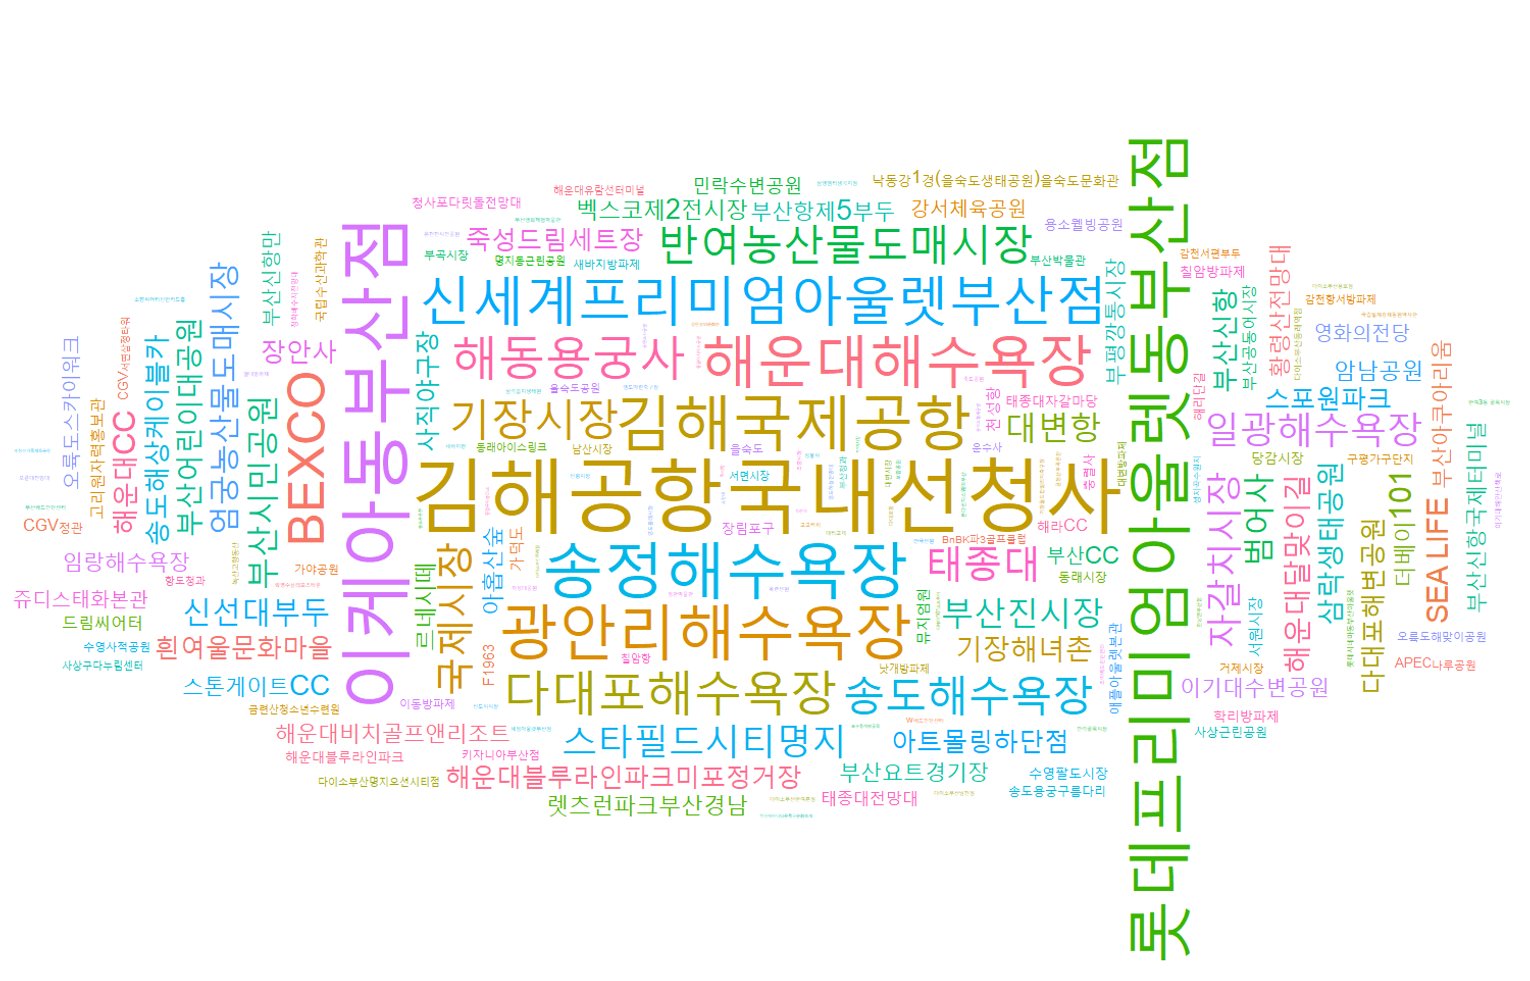

In [3]:
Image("C:/k_digital/source/r_source/ENergy/wordcloud.png")

In [ ]:
library(dplyr)
library(ggplot2)
library(wordcloud)
library(ggwordclou)

rank <- rank %>%
  mutate(angle = 90 * sample(c(0, 1), n(), replace = TRUE, prob = c(60, 40)))

set.seed(1)
ggplot(rank, aes(label=name, size=nums, color=name, angle = angle)) + 
  geom_text_wordcloud() +
  scale_size_area(max_size = 20) +
  theme_minimal()

- 여행을 다녀오지 않은 이유 2018 ~ 2021 그래프 코드

In [ ]:
why <-read_excel('여행을_다녀오지_않은_이유.xlsx')

why <- rename(why, '연도'='...1')
why <- rename(why, '이유'='...2')
why <- as.data.frame(why)
why$연도 <- as.integer(why$연도)

why2018 <- why[why$연도==2018,]
str(why2018)
ggplot(why2018,aes(x="",y= 소계,fill = 이유))
ggplot(why2018, aes(x='', y = 소계, fill = 이유))+
  geom_bar(width = 1,stat = 'identity',color = 'white') + coord_polar('y')


ggplot(why2018, aes(x='', y = 소계, fill = 이유), )+
  geom_bar(width = 1,stat = 'identity',color = 'white',explode = 0.1) 
	+ coord_polar('y')

- 2019-2021 관광 인프라 그래프 코드

In [ ]:
BTB <- read_excel('BusanTourBusiness.xlsx')
str(BTB)

tibble [68 × 4] (S3: tbl_df/tbl/data.frame)
 $ year : num [1:68] 2018 2018 2018 2018 2018 ...
 $ type1: chr [1:68] "관광숙박업" "관광숙박업" "관광숙박업" "관광숙박업" ...
 $ type2: chr [1:68] "가족호텔업" "관광호텔업" "기타호텔업" "휴양콘도미니엄업" ...
 $ tot  : num [1:68] 1 80 67 5 1 1 17 5 141 1 ...

BTB$type1 <- as.factor(BTB$type1)
BTB$type2 <- as.factor(BTB$type2)

BTBS <- BTB %>% group_by(year, type1) %>% summarise(sum=sum(tot))

In [ ]:
BTBS %>% ggplot(aes(year,sum,fill=type1)) + geom_col(position = 'dodge') +
theme(axis.title = element_blank(), legend.title = element_blank())

- 와플 코드

In [ ]:
#install.packages('waffle')
library(waffle)
waffle(c('만족'=76,'불만족'=24),flip=T,size=2,colors=c('green','red'))